<a href="https://colab.research.google.com/github/JayantJharkhande3000/CS6910_Assignment/blob/main/Part_A_Question_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Question number 01

Importing all packages and libraries

In [ ]:
import pathlib
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental.preprocessing import Rescaling
from PIL import Image

Importing inaturalist_12K data 

In [ ]:
data_directory = pathlib.Path('/content/drive/MyDrive/DATA/nature_12K/inaturalist_12K')
training_data = tf.keras.preprocessing.image_dataset_from_directory(
                      directory = "/content/drive/MyDrive/DATA/nature_12K/inaturalist_12K/train",
                      labels = 'inferred',  
                      label_mode = 'categorical',
                      color_mode = 'rgb',
                      batch_size = 32,
                      image_size = (256, 256),
                      shuffle = True,
                      seed = 17,
                      validation_split = 0.2,
                      subset = 'training')

validation_data = tf.keras.preprocessing.image_dataset_from_directory(
                      directory = "/content/drive/MyDrive/DATA/nature_12K/inaturalist_12K/val",
                      labels = 'inferred',  
                      label_mode = 'categorical',
                      color_mode = 'rgb',
                      batch_size = 32,
                      image_size = (256, 256),
                      shuffle = True,
                      seed = 17,
                      validation_split = 0.9,
                      subset = 'validation')

Found 9999 files belonging to 10 classes.
Using 8000 files for training.
Found 2000 files belonging to 10 classes.
Using 1800 files for validation.


Spliting the data in 90-10 ratio

In [ ]:
length_train, length_val = len(training_data), len(validation_data)
training_data = training_data.take(int(0.10*length_train))
validation_data = validation_data.take(int(length_val))

Model Parameter ############

In [ ]:
first_layer_filters = 32
filter_org = 1
data_aug = False
batch_norm = False
dropout = 0.2
kernel_size = 3
dense_size = 32
activation = 'relu'
num_epochs = 50
optimizer = 'adam'
conv_layers = 5

Model Building

In [ ]:
inputs = tf.keras.Input(shape = (256, 256, 3))
x = Rescaling(scale = 1.0/255)(inputs)
filter_sizes = [int(first_layer_filters*(filter_org**layer_num)) for layer_num in range(conv_layers)]

Convolutional layer

In [ ]:
for layer_num in range(conv_layers):
  x = layers.Conv2D(filters = filter_sizes[layer_num], kernel_size = (kernel_size, kernel_size))(x)
  if batch_norm:
    x = layers.BatchNormalization(axis = -1)(x)
  x = layers.Activation(activation)(x)
  x = layers.MaxPooling2D(pool_size = (2, 2))(x)            

Dense layer

In [ ]:
x = layers.Flatten()(x)
x = layers.Dense(dense_size)(x)
if batch_norm:
    x = layers.BatchNormalization(axis = -1)(x)
x = layers.Activation(activation)(x)
if dropout > 0:
    x = layers.Dropout(rate = dropout)(x) 

Output layer - activation: softmax function 

In [ ]:
outputs = layers.Dense(10, activation ='softmax')(x)
model = tf.keras.Model(inputs = inputs, outputs = outputs)

In [ ]:
model.compile(optimizer= optimizer, loss = tf.keras.losses.CategoricalCrossentropy(name = 'loss'),
                      metrics = [tf.keras.metrics.CategoricalAccuracy(name = 'acc')])

Model summary

In [ ]:
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 rescaling_2 (Rescaling)     (None, 256, 256, 3)       0         
                                                                 
 conv2d_11 (Conv2D)          (None, 254, 254, 32)      896       
                                                                 
 activation_12 (Activation)  (None, 254, 254, 32)      0         
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 127, 127, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 125, 125, 32)      9248      
                                                           

In [ ]:
model_history = model.fit(training_data, epochs = num_epochs, validation_data = validation_data)

Epoch 1/50
25/25 [==============================] - 290s 11s/step - loss: 2.3048 - acc: 0.0962 - val_loss: 2.3025 - val_acc: 0.1028
Epoch 2/50
25/25 [==============================] - 21s 813ms/step - loss: 2.3032 - acc: 0.0988 - val_loss: 2.3013 - val_acc: 0.1039
Epoch 3/50
25/25 [==============================] - 21s 795ms/step - loss: 2.3027 - acc: 0.1088 - val_loss: 2.3016 - val_acc: 0.1067
Epoch 4/50
25/25 [==============================] - 21s 785ms/step - loss: 2.2988 - acc: 0.1350 - val_loss: 2.3004 - val_acc: 0.1139
Epoch 5/50
25/25 [==============================] - 21s 788ms/step - loss: 2.2968 - acc: 0.1462 - val_loss: 2.2933 - val_acc: 0.1056
Epoch 6/50
25/25 [==============================] - 21s 792ms/step - loss: 2.2854 - acc: 0.1088 - val_loss: 2.2916 - val_acc: 0.1211
Epoch 7/50
25/25 [==============================] - 21s 795ms/step - loss: 2.2762 - acc: 0.1388 - val_loss: 2.2709 - val_acc: 0.1300
Epoch 8/50
25/25 [==============================] - 21s 810ms/step - l

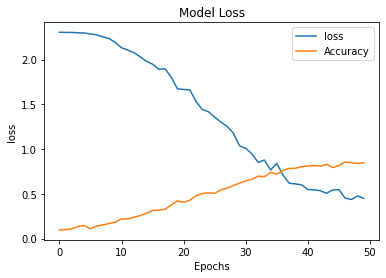

In [ ]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['acc'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('Epochs')
plt.legend(['loss', 'Accuracy'])
plt.show()